In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, f_regression, SelectKBest, f_classif, \
    mutual_info_classif

In [22]:
import pandas as pd

automobile = pd.read_csv('/Users/alina.riabushenko/Documents/Унік/4курс_1сем/DS/Lab3/src/Automobile_data.csv', sep=',')
automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [36]:
automobile = automobile.replace("?", np.nan)
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
automobile[numeric_cols] = automobile[numeric_cols].astype(float)
automobile = automobile.dropna(how='all')
automobile.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


In [24]:
automobile.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [25]:
print(automobile.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [26]:
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


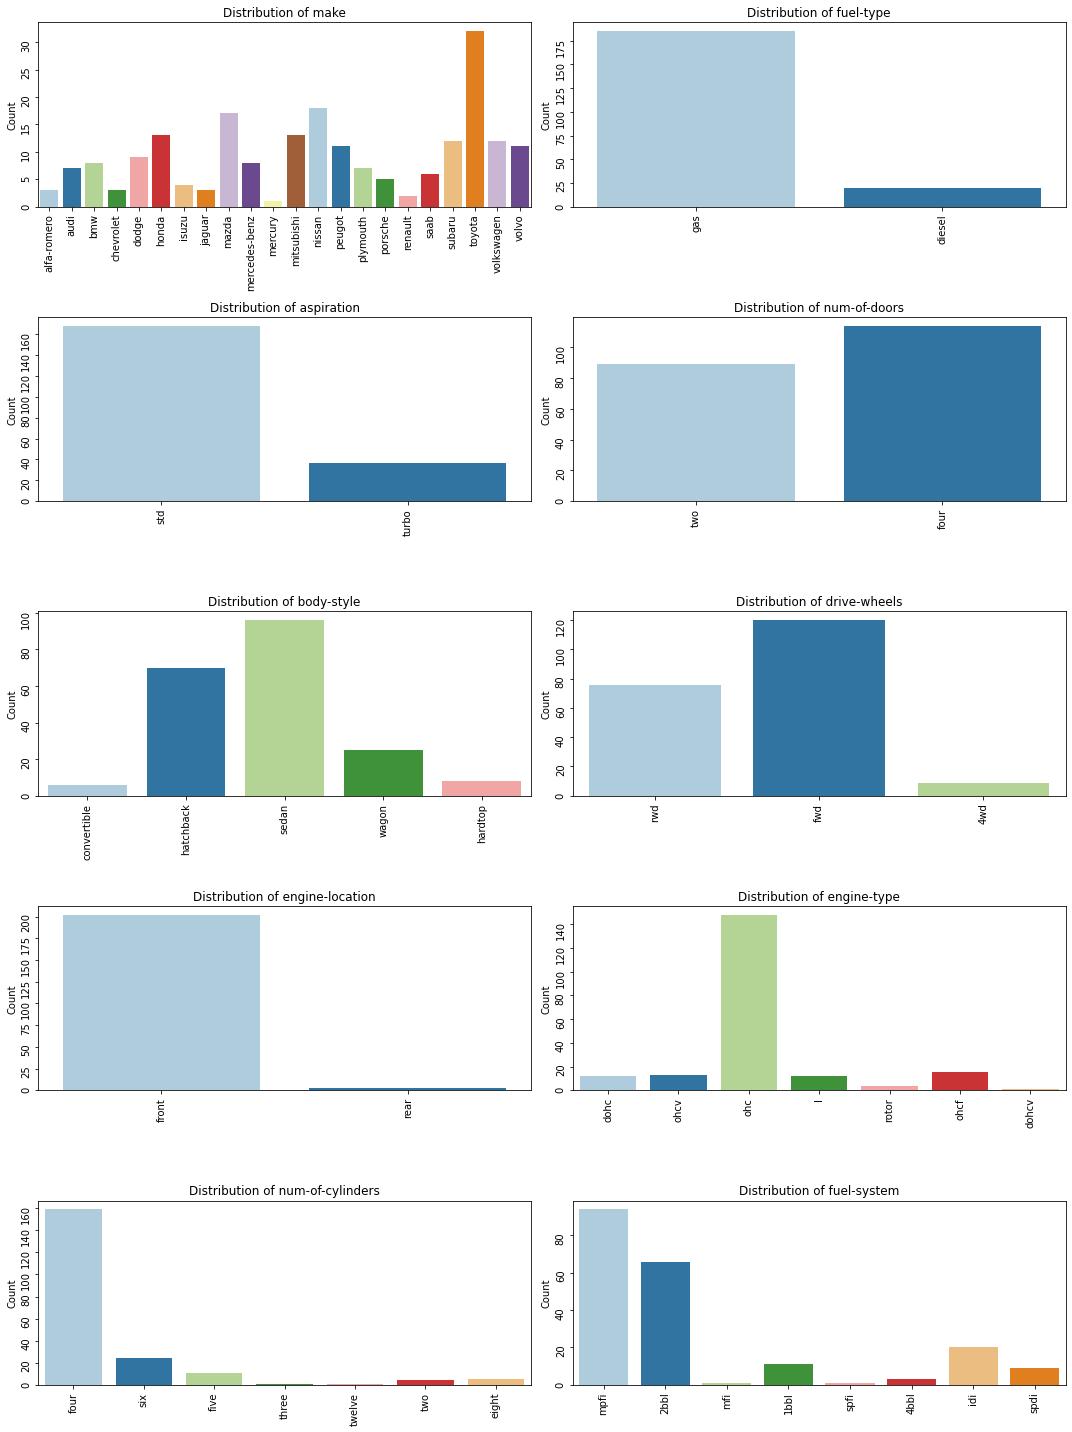

In [27]:
categories = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

fig, axes = plt.subplots(nrows=len(categories) // 2, ncols=2, figsize=(15, 20))

colors = sns.color_palette("Paired")  

for i, feature in enumerate(categories):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=automobile, ax=axes[row, col], palette=colors)
    axes[row, col].tick_params(labelrotation=90)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

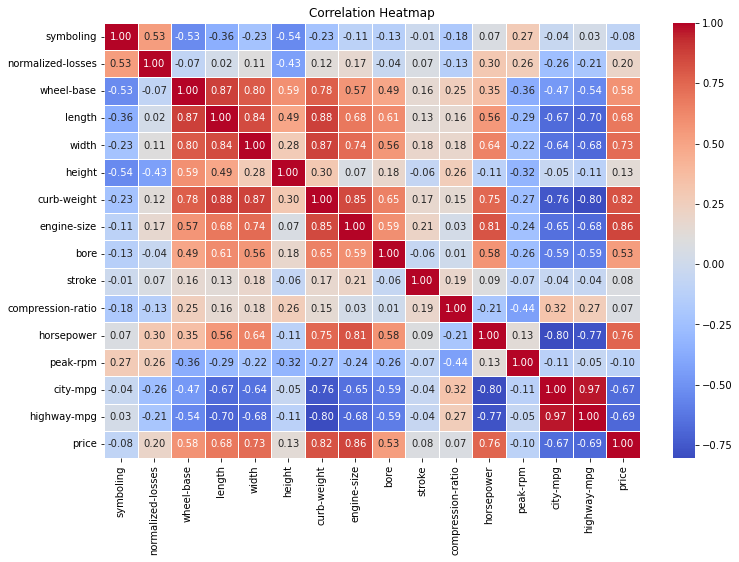

In [37]:

# Calculate correlation matrix
correlation_matrix = automobile.select_dtypes(include=['float64', 'int64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



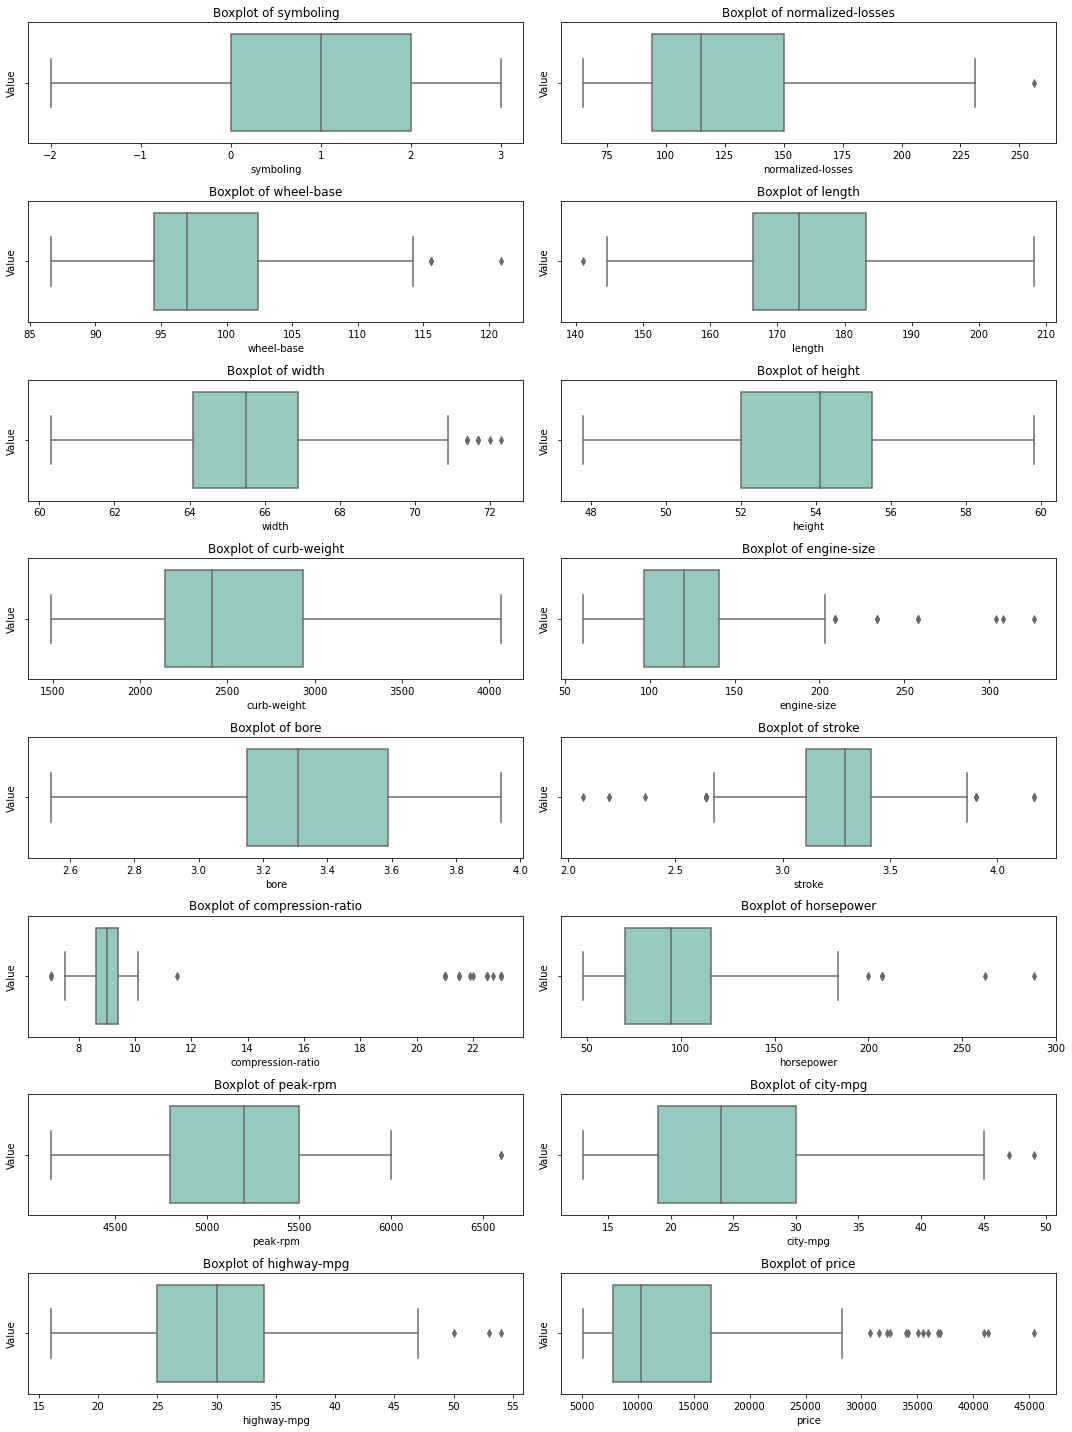

In [29]:
numeric_columns = automobile.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(numeric_columns) // 2, ncols=2, figsize=(15, 20))

colors = sns.color_palette("Set3")  

for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=column, data=automobile, ax=axes[row, col], palette=colors)
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Value')

plt.tight_layout()
plt.show()


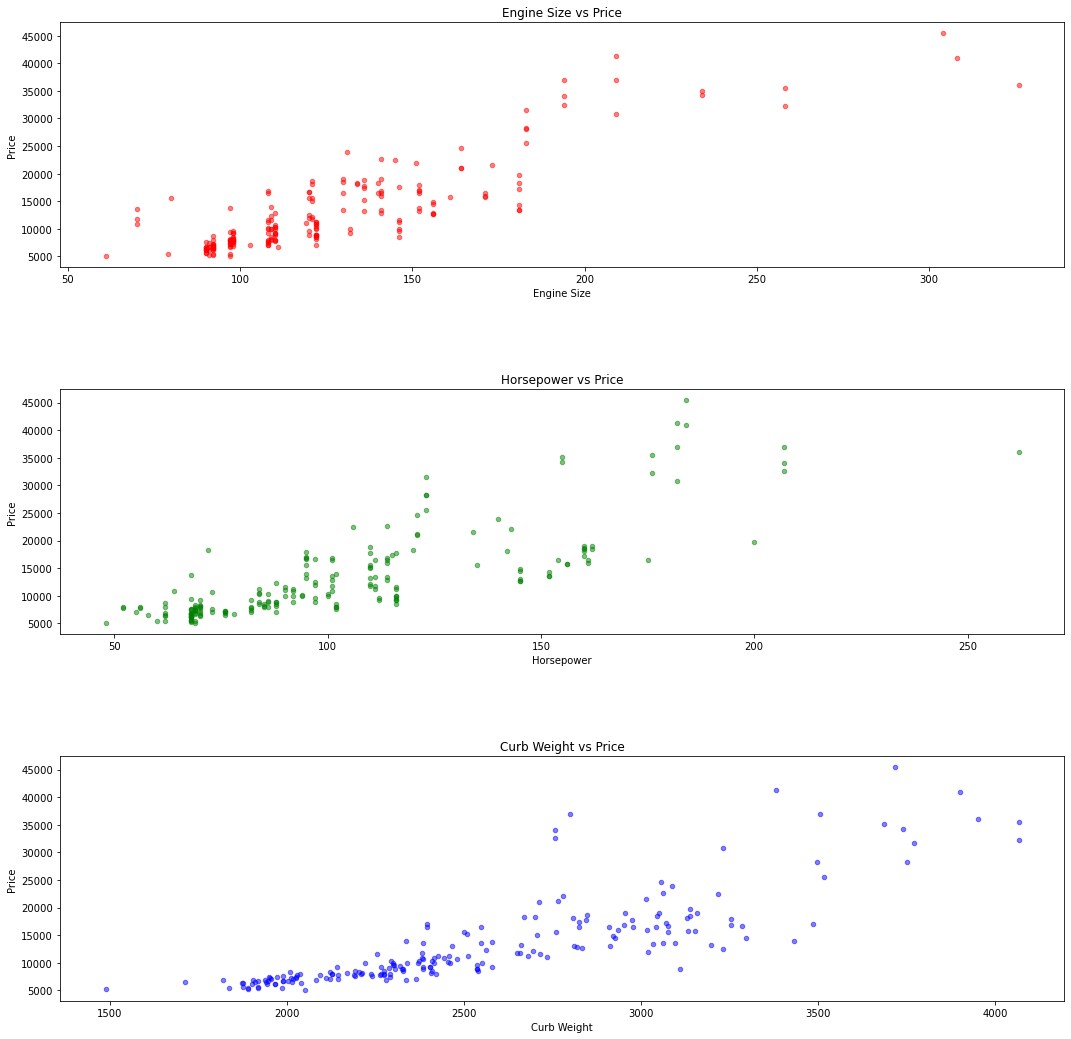

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))

colors = ['red', 'green', 'blue']

automobile.plot.scatter(x='engine-size', y='price', ax=axes[0], color=colors[0], alpha=0.5)
axes[0].set_title('Engine Size vs Price')
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Price')

automobile.plot.scatter(x='horsepower', y='price', ax=axes[1], color=colors[1], alpha=0.5)
axes[1].set_title('Horsepower vs Price')
axes[1].set_xlabel('Horsepower')
axes[1].set_ylabel('Price')

automobile.plot.scatter(x='curb-weight', y='price', ax=axes[2], color=colors[2], alpha=0.5)
axes[2].set_title('Curb Weight vs Price')
axes[2].set_xlabel('Curb Weight')
axes[2].set_ylabel('Price')

plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots

plt.show()

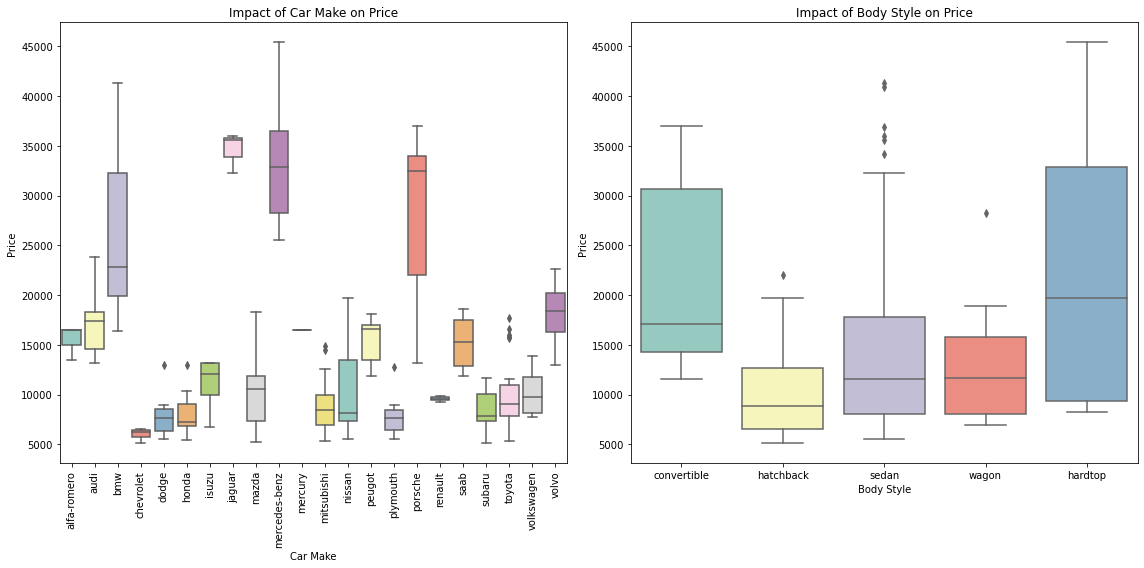

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

colors = sns.color_palette("Set3")

sns.boxplot(x='make', y='price', data=automobile, ax=axes[0], palette=colors)
axes[0].set_title('Impact of Car Make on Price')
axes[0].set_xlabel('Car Make')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x='body-style', y='price', data=automobile, ax=axes[1], palette=colors)
axes[1].set_title('Impact of Body Style on Price')
axes[1].set_xlabel('Body Style')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

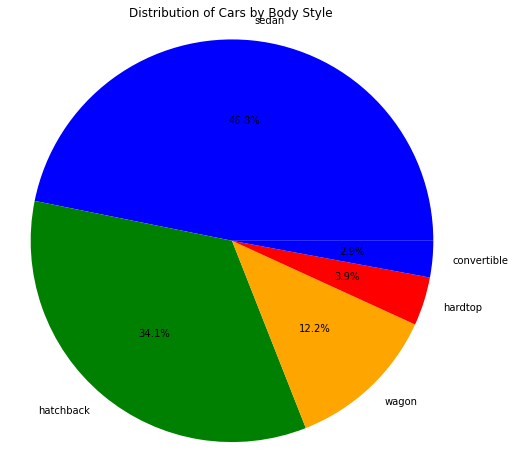

In [39]:
plt.figure(figsize=(8, 8))
colors = ['blue', 'green', 'orange', 'red']
body_style_counts = automobile['body-style'].value_counts()
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Cars by Body Style')
plt.axis('equal')
plt.show()

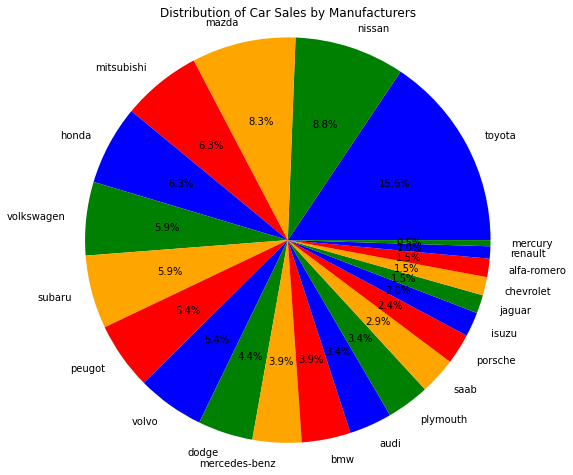

In [40]:
plt.figure(figsize=(8, 8))
colors = ['blue', 'green', 'orange', 'red']
manufacturer_counts = automobile['make'].value_counts()
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Car Sales by Manufacturers')
plt.axis('equal')
plt.show()

In [34]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn import preprocessing

nums_params = automobile.select_dtypes(include=['float64', 'int64'])

X = nums_params.drop("price", axis=1)
y = nums_params["price"]

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

selector = VarianceThreshold()
variance = selector.fit(X)

fscore = SelectKBest(f_classif, k='all')
fscore.fit_transform(X, y)

lab = preprocessing.LabelEncoder()
mutual = SelectKBest(mutual_info_classif, k='all')
mutual.fit_transform(X, lab.fit_transform(y))

result_df = pd.DataFrame(index=X.columns)
result_df["Variance Threshold"] = variance.variances_
result_df['F-Score'] = fscore.scores_
result_df['MutualInformation'] = mutual.scores_

result_df.transpose()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
Variance Threshold,1.543224,191.000000,34.300000,67.000000,4.579451,5.941674,2578.000000,265.000000,0.072998,0.097863,15.700143,240.000000,2450.000000,36.000000,38.000000
F-Score,2.090053,6.539096,8.720269,4.907442,1.519637,2.905840,2.700448,3.600884,1.155205,2.516170,1.541509,0.824556,5.426939,1.487750,2.011838
MutualInformation,0.990314,0.773922,1.083244,1.325904,1.576154,1.405885,1.412098,1.124349,1.371659,1.570079,1.571045,1.893284,1.289554,1.501943,1.493849


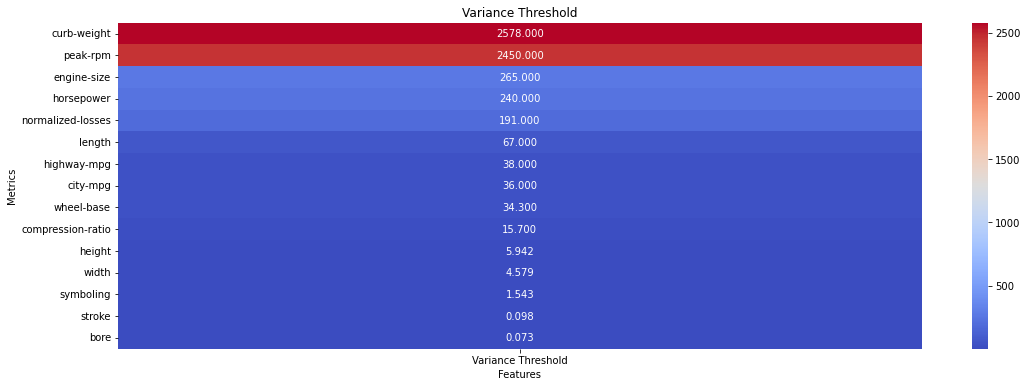

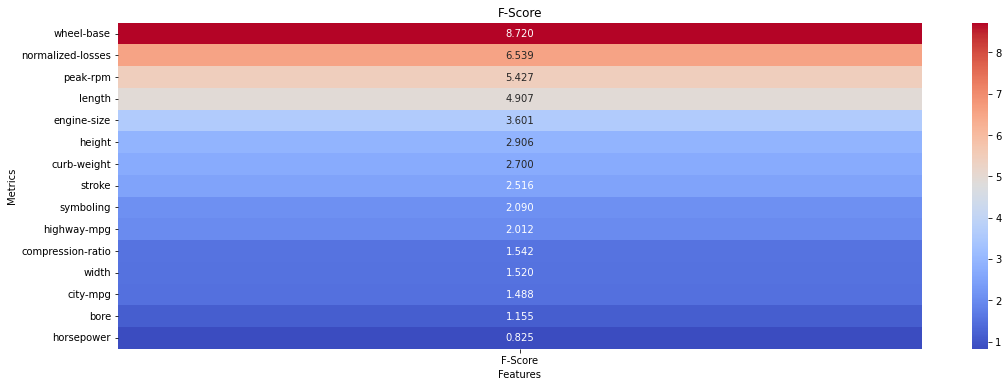

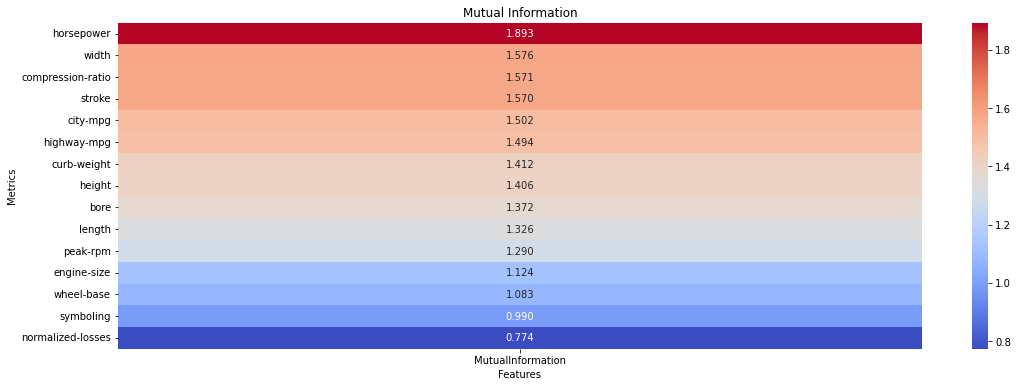

In [35]:
plt.figure(figsize=(18, 6))
sns.heatmap(result_df[["Variance Threshold"]].sort_values(by='Variance Threshold', ascending=False), annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Variance Threshold')
plt.xlabel('Features')
plt.ylabel('Metrics')
plt.show()

plt.figure(figsize=(18, 6))
sns.heatmap(result_df[["F-Score"]].sort_values(by='F-Score', ascending=False), annot=True, fmt=".3f", cmap='coolwarm')
plt.title('F-Score')
plt.xlabel('Features')
plt.ylabel('Metrics')
plt.show()

plt.figure(figsize=(18, 6))
sns.heatmap(result_df[["MutualInformation"]].sort_values(by='MutualInformation', ascending=False), annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Mutual Information')
plt.xlabel('Features')
plt.ylabel('Metrics')
plt.show()
